In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
# !pip install haversine
# from haversine import haversine
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

from math import radians, sin, cos, acos, pi, atan2, sqrt

In [2]:
for i in tqdm(range(10000)):
    pass

100%|██████████| 10000/10000 [00:00<00:00, 3333574.95it/s]


In [2]:
!python -V

Python 3.10.9


In [2]:
def deg2rad(deg):
  return (deg * (pi/180))
  
def getDistanceFromLatLonInKm(lat1,lon1,lat2,lon2):
    R = 6371 # Radius of the earth in km 3963 for miles 6371 for kms
    dLat = deg2rad(lat2-lat1) # deg2rad below
    dLon = deg2rad(lon2-lon1) 
    a = sin(dLat/2) * sin(dLat/2) + cos(deg2rad(lat1)) * cos(deg2rad(lat2)) * sin(dLon/2) * sin(dLon/2)
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    d = R * c # Distance in km
    # d = haversine((lat1, lon1), (lat2, lon2), unit='km')
    return d

In [3]:
def read_dataframe(file):
    df = pd.read_csv(file)
    
    df.dropna(inplace=True)
    df = df[['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'member_casual', 'start_lat', 'start_lng', 'end_lat', 'end_lng']]
    
    df['started_at'] = pd.to_datetime(df['started_at'])
    df['ended_at'] = pd.to_datetime(df['ended_at'])


    df['distance']  = df.apply(lambda row: getDistanceFromLatLonInKm(row['start_lat'],row['start_lng'],row['end_lat'],row['end_lng']),axis=1)
    df['duration'] = df.ended_at - df.started_at
    df.duration = df.duration.apply(lambda td: td.total_seconds()/60)
    df['hour_of_day'] = df.started_at.dt.hour
    df['day_of_week'] = df.started_at.dt.day_of_week
    df = df[(df.duration >= 1) & (df.duration <= 30 )].copy() #& (df.hour_of_day >= 5)

    return df

In [4]:
# train_df = read_dataframe("./data/202305-citibike-tripdata.csv")
# val_df = read_dataframe("./data/202304-citibike-tripdata.csv")
train_df = read_dataframe("./data/JC-202305-citibike-tripdata.csv")
val_df = read_dataframe("./data/JC-202304-citibike-tripdata.csv")

In [5]:
train_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,start_lat,start_lng,end_lat,end_lng,distance,duration,hour_of_day,day_of_week
0,BC145343639B5E5B,classic_bike,2023-05-31 12:27:28,2023-05-31 12:38:36,Pershing Field,JC024,Newport PATH,JC066,member,40.742675,-74.051806,40.727224,-74.033759,2.294339,11.133333,12,2
1,A0CE41F47514FF5C,classic_bike,2023-05-01 18:12:37,2023-05-01 18:29:03,Pershing Field,JC024,Baldwin at Montgomery,JC020,casual,40.742638,-74.051815,40.723659,-74.064194,2.354073,16.433333,18,0
3,89AC48A5584B2DB4,classic_bike,2023-05-27 21:01:37,2023-05-27 21:13:16,Pershing Field,JC024,Manila & 1st,JC082,member,40.742677,-74.051789,40.721651,-74.042884,2.455469,11.650000,21,5
4,709E0B11AB4A0E6C,classic_bike,2023-05-22 12:38:54,2023-05-22 13:02:13,Pershing Field,JC024,Jersey & 3rd,JC074,member,40.742677,-74.051789,40.723332,-74.045953,2.206617,23.316667,12,0
5,E5CB0D91D77D7ABC,classic_bike,2023-05-29 18:31:14,2023-05-29 18:36:40,Hilltop,JC019,Brunswick St,JC023,member,40.731169,-74.057574,40.724176,-74.050656,0.971745,5.433333,18,0


<Axes: >

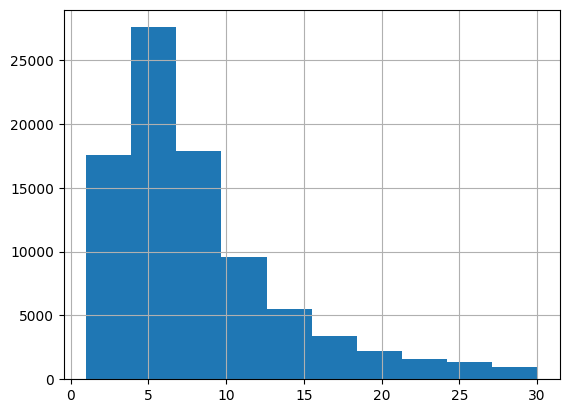

In [6]:
train_df.duration.hist()

In [7]:
train_df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,start_lat,start_lng,end_lat,end_lng,distance,duration,hour_of_day,day_of_week
0,BC145343639B5E5B,classic_bike,2023-05-31 12:27:28,2023-05-31 12:38:36,Pershing Field,JC024,Newport PATH,JC066,member,40.742675,-74.051806,40.727224,-74.033759,2.294339,11.133333,12,2
1,A0CE41F47514FF5C,classic_bike,2023-05-01 18:12:37,2023-05-01 18:29:03,Pershing Field,JC024,Baldwin at Montgomery,JC020,casual,40.742638,-74.051815,40.723659,-74.064194,2.354073,16.433333,18,0
3,89AC48A5584B2DB4,classic_bike,2023-05-27 21:01:37,2023-05-27 21:13:16,Pershing Field,JC024,Manila & 1st,JC082,member,40.742677,-74.051789,40.721651,-74.042884,2.455469,11.650000,21,5
4,709E0B11AB4A0E6C,classic_bike,2023-05-22 12:38:54,2023-05-22 13:02:13,Pershing Field,JC024,Jersey & 3rd,JC074,member,40.742677,-74.051789,40.723332,-74.045953,2.206617,23.316667,12,0
5,E5CB0D91D77D7ABC,classic_bike,2023-05-29 18:31:14,2023-05-29 18:36:40,Hilltop,JC019,Brunswick St,JC023,member,40.731169,-74.057574,40.724176,-74.050656,0.971745,5.433333,18,0


In [31]:


haversine((40.757306457, -73.974517584), (40.7689738, -73.95482273), unit='km')

2.105816521054976

In [8]:
categorical = ['start_station_id', 'end_station_id', 'rideable_type', 'hour_of_day', 'day_of_week', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual']
numerical = ['distance']

train_df[categorical] = train_df[categorical].astype(str)
val_df[categorical] = val_df[categorical].astype(str)

train_df['start_lat_lng'] = train_df['start_lat'] + '_' + train_df['start_lng']
train_df['end_lat_lng'] = train_df['end_lat'] + '_' + train_df['end_lng']
train_df['start_stop'] = train_df['start_station_id'] + '_' + train_df['end_station_id']
val_df['start_lat_lng'] = val_df['start_lat'] + '_' + val_df['start_lng']
val_df['end_lat_lng'] = val_df['end_lat'] + '_' + val_df['end_lng']
val_df['start_stop'] = val_df['start_station_id'] + '_' + val_df['end_station_id']

categorical = ['start_stop', 'rideable_type', 'hour_of_day', 'day_of_week', 'member_casual'] # 'member_casual', 'hour_of_day', 'day_of_week', 'start_station_id', 'end_station_id' 'start_station_name', 'end_station_name', 'start_lat_lng', 'end_lat_lng'
numerical = ['distance']

train_dicts = train_df[categorical + numerical].to_dict(orient='records')
val_dicts = val_df[categorical + numerical].to_dict(orient='records')


dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

target = 'duration'

y_train = train_df[target].values
y_val = val_df[target].values

In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = lr.predict(X_val)
mean_squared_error(y_val, y_pred, squared=False).round(2)

3.91

/tmp/ipykernel_34001/2624495092.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')


/tmp/ipykernel_34001/2624495092.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_val, label='actual')


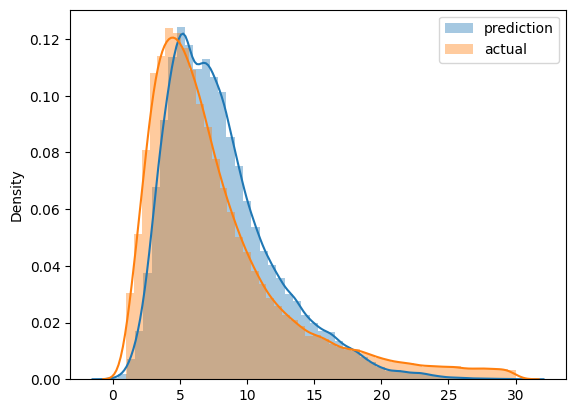

In [11]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_val, label='actual')

plt.legend()

/tmp/ipykernel_34001/2499170286.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['hour_of_day'])


<Axes: xlabel='hour_of_day', ylabel='Density'>

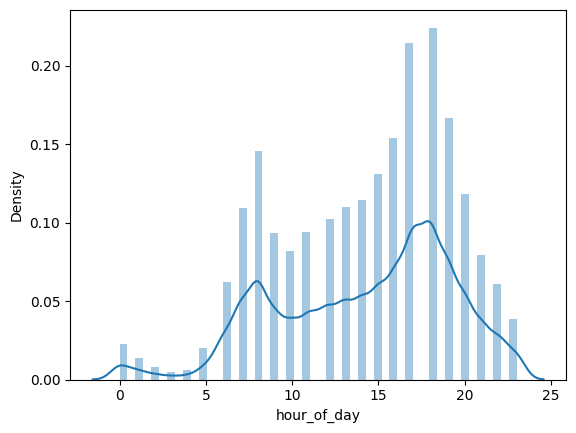

In [12]:
sns.distplot(train_df['hour_of_day'])

In [21]:
import xgboost as xgb
import mlflow

from mlflow.tracking import MlflowClient

from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope

In [25]:
mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("citibike-experiment")
mlflow.set_tag("model", "xgboost")

In [26]:
mlflow.end_run()

In [30]:
client = MlflowClient()
experiments = (
    client.search_experiments()
)  

In [31]:
experiments

[<Experiment: artifact_location='gs://citibike-mlops/mlflow/s/3', creation_time=1690199172582, experiment_id='3', last_update_time=1690199172582, lifecycle_stage='active', name='citibike-optimization-experiment', tags={}>,
 <Experiment: artifact_location='/home/singh/mlops-zoomcamp-2023-project/mlruns/2', creation_time=1689857300990, experiment_id='2', last_update_time=1689857300990, lifecycle_stage='active', name='citibike-autolog-experiment', tags={}>,
 <Experiment: artifact_location='/home/singh/mlops-zoomcamp-2023-project/mlruns/1', creation_time=1689772106862, experiment_id='1', last_update_time=1689772106862, lifecycle_stage='active', name='citibike-experiment', tags={}>,
 <Experiment: artifact_location='mlflow-artifacts:/0', creation_time=1689772095966, experiment_id='0', last_update_time=1689772095966, lifecycle_stage='active', name='Default', tags={}>]

In [17]:
train = xgb.DMatrix(X_train, label=y_train)
valid = xgb.DMatrix(X_val, label=y_val)

In [18]:
def objective(params):
    with mlflow.start_run():
        mlflow.set_tag("model", "xgboost")
        mlflow.log_params(params)
        booster = xgb.train(
            params = params,
            dtrain = train,
            num_boost_round = 1000,
            evals = [(valid, "validation")],
            early_stopping_rounds = 50
        )

        y_pred = booster.predict(valid)
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        mlflow.log_metric("rmse", rmse)

    return {'loss': rmse, 'status': STATUS_OK}

In [19]:
search_space = {
    'max_depth': scope.int(hp.quniform('max_depth', 4, 20, 1)),
    'learning_rate': hp.loguniform('learning_rate', -3, 0),
    'reg_alpha': hp.loguniform('reg_alpha', -5, -1),
    'reg_lambda': hp.loguniform('reg_lambda', -6, -1),
    'min_child_weight': hp.loguniform('min_child_weight', -1, 3),
    'objective': 'reg:linear',
    'seed': 42,
}

In [29]:
best_result = fmin(
    fn = objective,
    space = search_space,
    algo = tpe.suggest,
    max_evals = 5,
    trials = Trials()
)

[08:57:55] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation-rmse:7.17687                          
[1]	validation-rmse:5.89520                          
[2]	validation-rmse:5.05793                          
[3]	validation-rmse:4.53910                          
[4]	validation-rmse:4.23199                          
[5]	validation-rmse:4.05986                          
[6]	validation-rmse:3.96647                          
[7]	validation-rmse:3.91910                          
[8]	validation-rmse:3.89305                          
[9]	validation-rmse:3.88247                          
[10]	validation-rmse:3.87709                         
[11]	validation-rmse:3.87786                         
[12]	validation-rmse:3.87710                         
[13]	validation-rmse:3.87826                         
[14]	validation-rmse:3.87820                         
[15]	validation-rmse:3.88088                         
[16]	validation-r